# Data Exploration
## Basic Visualisation
## Calculate Correlation

In [14]:
import math
import pandas as pd
from sklearn import neighbors, datasets , preprocessing,svm
from sklearn.metrics import accuracy_score ,classification_report, confusion_matrix, roc_curve
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score, train_test_split
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [19]:
df = pd.read_csv('mm_master_demos.csv')
del df['Unnamed: 0']
del df['file']
del df['date']
del df['seconds']
del df['att_team']
del df['att_side']
del df['vic_team']
del df['vic_side']
del df['winner_team']
del df['winner_side']
del df['att_id']
del df['vic_id']
del df['award']
del df['is_bomb_planted']
del df['bomb_site']
data=df.copy()
data=shuffle(data)
data

,map,round,tick,hp_dmg,arm_dmg,hitbox,wp,wp_type,att_rank,vic_rank,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y,round_type,ct_eq_val,t_eq_val,avg_match_rank
241427,de_mirage,21,123306,27,5,Stomach,M4A4,Rifle,10,10,464.04930,-1574.76200,-133.864700,-1452.06300,NORMAL,17800,22600,10.0
499740,de_dust2,13,80575,20,6,Stomach,M4A4,Rifle,11,13,-423.35560,1700.22200,-324.182200,2115.88500,FORCE_BUY,12950,24800,12.0
709150,de_mirage,23,129662,34,4,Stomach,AK47,Rifle,6,11,-878.85180,-2265.78300,-1098.607000,-2509.54900,NORMAL,16000,20800,8.0
579829,de_inferno,7,47128,54,0,Generic,HE,Grenade,13,14,267.99390,1290.05500,598.074200,2069.09500,ECO,1000,21850,13.0
229185,de_dust2,13,86683,16,0,Chest,FiveSeven,Pistol,17,16,1255.23500,2876.69300,1395.368000,1523.58300,NORMAL,21050,27150,16.0
327780,de_cbble,21,128815,22,15,Head,AK47,Rifle,9,10,630.51830,-241.80680,-487.700000,-603.67620,NORMAL,19100,24600,9.0
425395,de_dust2,9,63290,28,6,Stomach,M4A1,Rifle,8,10,-418.08280,-294.92610,-478.044400,436.38670,ECO,27200,1900,9.0
399557,de_mirage,5,36848,20,0,Head,UMP,SMG,10,7,-1676.71800,533.51380,-2266.585000,506.71240,SEMI_ECO,21300,8650,9.0
412505,de_inferno,7,51858,4,0,Generic,Incendiary,Grenade,10,11,1206.77700,460.59060,1505.021000,81.02738,ECO,32800,10850,10.0
197579,de_cbble,9,49323,100,15,Head,AK47,Rifle,15,16,398.56130,-196.47970,172.616600,-395.78190,ECO,6600,28050,16.0


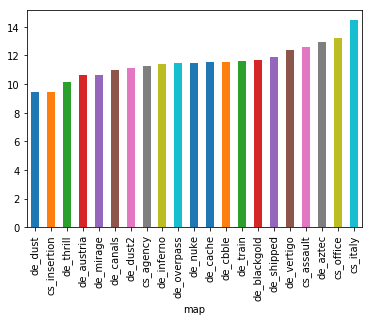

In [20]:
data.groupby('map')['att_rank'].mean().sort_values().plot(kind='bar')

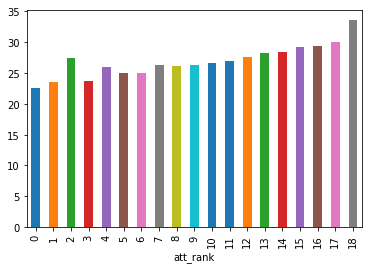

In [21]:
data.groupby('att_rank')['hp_dmg'].mean().plot(kind='bar')

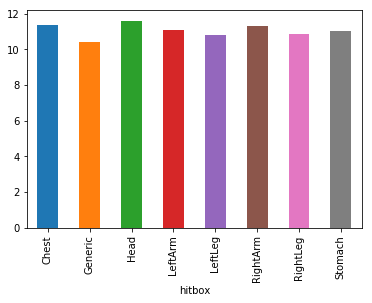

In [22]:
data.groupby('hitbox')['att_rank'].mean().plot(kind='bar')

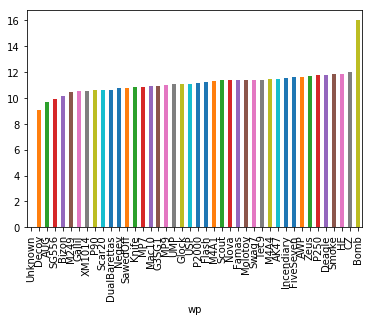

In [23]:
data.groupby('wp')['att_rank'].mean().sort_values().plot(kind='bar')

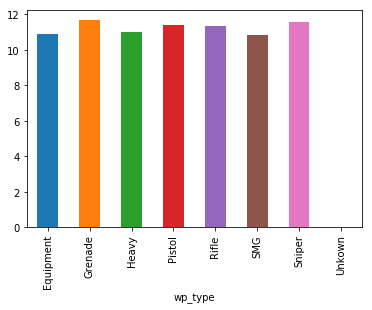

In [24]:
data.groupby('wp_type')['att_rank'].mean().plot(kind='bar')

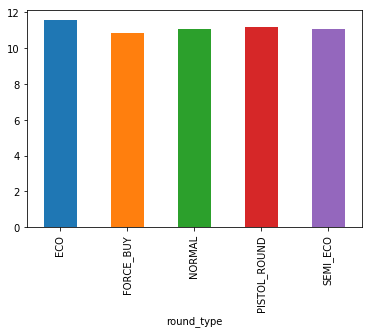

In [25]:
data.groupby('round_type')['att_rank'].mean().plot(kind='bar')

In [26]:
data.round_type.value_counts()

NORMAL          425090
ECO             244599
FORCE_BUY       143944
PISTOL_ROUND     75133
SEMI_ECO         66700
Name: round_type, dtype: int64

In [27]:
data.dtypes

map                object
round               int64
tick                int64
hp_dmg              int64
arm_dmg             int64
hitbox             object
wp                 object
wp_type            object
att_rank            int64
vic_rank            int64
att_pos_x         float64
att_pos_y         float64
vic_pos_x         float64
vic_pos_y         float64
round_type         object
ct_eq_val           int64
t_eq_val            int64
avg_match_rank    float64
dtype: object

# Data Preparation
## Filer
- Normalization
- Convert Text values to numbers

## Convert Categories
### Hitbox
Head and Chest --> UpperBody --> 0
Stomach and Arms --> CenterBody --> 1
Legs and Generic --> LowerBody --> 2

### Map
low skill high skill?

### Weapons
one hot encode has_bomb --> can KNN handle 0 values?
what todo with rest??

### Round Type
ECO --> 0
NORMAL, PISTOL, SEMI_ECO --> 1
FORCE_BUY --> 2

In [28]:
numeric_cats = {
    "hitbox": {"Head": 0, "Chest": 0, "Stomach": 1, "RightArm": 1, "LeftArm": 1, "Generic": 2, "RightLeg": 2, "LeftLeg": 2},
    "round_type": {"ECO": 0, "NORMAL": 1, "PISTOL_ROUND": 1, "SEMI_ECO": 1, "FORCE_BUY": 2}
}
data.replace(numeric_cats, inplace=True)
data.head()
data.hitbox.value_counts()
data.dtypes

map                object
round               int64
tick                int64
hp_dmg              int64
arm_dmg             int64
hitbox              int64
wp                 object
wp_type            object
att_rank            int64
vic_rank            int64
att_pos_x         float64
att_pos_y         float64
vic_pos_x         float64
vic_pos_y         float64
round_type          int64
ct_eq_val           int64
t_eq_val            int64
avg_match_rank    float64
dtype: object

In [29]:
data = pd.get_dummies(data, columns=['map', 'wp_type', 'wp'])
data.head()
data.dtypes

round                 int64
tick                  int64
hp_dmg                int64
arm_dmg               int64
hitbox                int64
att_rank              int64
vic_rank              int64
att_pos_x           float64
att_pos_y           float64
vic_pos_x           float64
vic_pos_y           float64
round_type            int64
ct_eq_val             int64
t_eq_val              int64
avg_match_rank      float64
map_cs_agency         uint8
map_cs_assault        uint8
map_cs_insertion      uint8
map_cs_italy          uint8
map_cs_office         uint8
map_de_austria        uint8
map_de_aztec          uint8
map_de_blackgold      uint8
map_de_cache          uint8
map_de_canals         uint8
map_de_cbble          uint8
map_de_dust           uint8
map_de_dust2          uint8
map_de_inferno        uint8
map_de_mirage         uint8
                     ...   
wp_G3SG1              uint8
wp_Gallil             uint8
wp_Glock              uint8
wp_HE                 uint8
wp_Incendiary       

In [30]:
rankData = data['att_rank']
normalizedData = (data-data.min())/(data.max()-data.min())
normalizedData['att_rank']=rankData.values
normalizedData

,round,tick,hp_dmg,arm_dmg,hitbox,att_rank,vic_rank,att_pos_x,att_pos_y,vic_pos_x,...,wp_Scar20,wp_Scout,wp_Smoke,wp_Swag7,wp_Tec9,wp_UMP,wp_USP,wp_Unknown,wp_XM1014,wp_Zeus
241427,0.689655,0.530915,0.27,0.05,0.5,10,0.555556,0.599712,0.151517,0.566391,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
499740,0.413793,0.337314,0.20,0.06,0.5,11,0.722222,0.548791,0.329931,0.555495,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
709150,0.758621,0.559712,0.34,0.04,0.5,6,0.611111,0.522654,0.113871,0.511159,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
579829,0.206897,0.185776,0.54,0.00,1.0,13,0.777778,0.588462,0.307586,0.608295,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
229185,0.413793,0.364988,0.16,0.00,0.0,17,0.888889,0.645111,0.394023,0.653941,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
327780,0.689655,0.555875,0.22,0.15,0.0,9,0.555556,0.609264,0.224133,0.546134,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
425395,0.275862,0.259001,0.28,0.06,0.5,8,0.555556,0.549094,0.221240,0.546686,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
399557,0.137931,0.139201,0.20,0.00,0.0,10,0.388889,0.476872,0.266371,0.444291,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
412505,0.206897,0.207207,0.04,0.00,1.0,10,0.611111,0.642330,0.262399,0.660219,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197579,0.275862,0.195721,1.00,0.15,0.0,15,0.888889,0.595954,0.226603,0.583937,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
normalizedData.corr()['att_rank']

round               0.012081
tick                0.006935
hp_dmg              0.057941
arm_dmg            -0.035189
hitbox             -0.096196
att_rank            1.000000
vic_rank            0.645005
att_pos_x           0.027995
att_pos_y           0.043982
vic_pos_x           0.026662
vic_pos_y           0.044857
round_type         -0.072260
ct_eq_val           0.020356
t_eq_val            0.010572
avg_match_rank      0.786182
map_cs_agency       0.001691
map_cs_assault      0.017514
map_cs_insertion   -0.016428
map_cs_italy        0.038824
map_cs_office       0.047763
map_de_austria     -0.007140
map_de_aztec        0.012892
map_de_blackgold    0.003963
map_de_cache        0.056034
map_de_canals      -0.004107
map_de_cbble        0.028597
map_de_dust        -0.020419
map_de_dust2       -0.012625
map_de_inferno      0.022741
map_de_mirage      -0.100396
                      ...   
wp_G3SG1           -0.002974
wp_Gallil          -0.022521
wp_Glock           -0.007075
wp_HE         

In [32]:
normalizedData.dtypes

round               float64
tick                float64
hp_dmg              float64
arm_dmg             float64
hitbox              float64
att_rank              int64
vic_rank            float64
att_pos_x           float64
att_pos_y           float64
vic_pos_x           float64
vic_pos_y           float64
round_type          float64
ct_eq_val           float64
t_eq_val            float64
avg_match_rank      float64
map_cs_agency       float64
map_cs_assault      float64
map_cs_insertion    float64
map_cs_italy        float64
map_cs_office       float64
map_de_austria      float64
map_de_aztec        float64
map_de_blackgold    float64
map_de_cache        float64
map_de_canals       float64
map_de_cbble        float64
map_de_dust         float64
map_de_dust2        float64
map_de_inferno      float64
map_de_mirage       float64
                     ...   
wp_G3SG1            float64
wp_Gallil           float64
wp_Glock            float64
wp_HE               float64
wp_Incendiary       

# KNN

In [16]:
y = normalizedData['att_rank']
X = normalizedData.copy()
del X['att_rank']

nEntries = 300000

knn=neighbors.KNeighborsClassifier(n_jobs=-1,n_neighbors=int(math.sqrt(nEntries)))
knn.fit(X.head(nEntries), y.head(nEntries))

prediction= knn.predict(X.iloc[nEntries:nEntries+10000])
print accuracy_score(y.iloc[nEntries:nEntries+10000],prediction)

0.2893


In [33]:
data = normalizedData[['hp_dmg', 'hitbox','att_rank','vic_rank','avg_match_rank']].copy()

y = data['att_rank']
X = data.copy()
del X['att_rank']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8,random_state=0)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(191093, 4) (191093,)
(764373, 4) (764373,)


In [18]:
knn=neighbors.KNeighborsClassifier(n_jobs=-1,n_neighbors=int(math.sqrt(len(X_train.index))))
knn.fit(X_train, y_train)

y_pred= knn.predict(X_test)
print accuracy_score(y_test,y_pred)

0.4218202369785432


## Option for improvment
- reduce output classes
- order weapons and map by rank

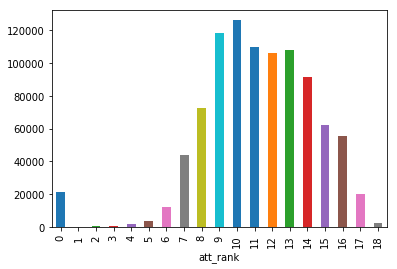

In [34]:
df.groupby('att_rank')['hp_dmg'].count().plot(kind='bar')

In [35]:
n_classes = 3
numeric_cats = {
    "att_rank": {0:"0", 1:"0", 2:"0", 3:"0", 4:"0", 5:"0", 6:"0", 7:"0", 8:"0", 
                9:"1", 10:"1", 11:"1", 12:"1",13:"1", 14:"1",
                15:"2", 16:"2", 17:"2", 18:"2"}
}
data.replace(numeric_cats, inplace=True)
data.head()

,hp_dmg,hitbox,att_rank,vic_rank,avg_match_rank
241427,0.27,0.5,1,0.555556,0.333333
499740,0.20,0.5,1,0.722222,0.555556
709150,0.34,0.5,0,0.611111,0.111111
579829,0.54,1.0,1,0.777778,0.666667
229185,0.16,0.0,2,0.888889,1.000000


In [37]:
y = data['att_rank']
X = data.copy()
del X['att_rank']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
knn=neighbors.KNeighborsClassifier(n_jobs=-1,n_neighbors=int(math.sqrt(len(X_train.index))))
knn.fit(X_train, y_train)

y_pred= knn.predict(X_test)
print accuracy_score(y_test,y_pred)

0.8412613687504579


# Confusion Matrix

             precision    recall  f1-score   support

          0       0.75      0.57      0.65     31338
          1       0.85      0.93      0.89    131804
          2       0.86      0.71      0.78     27952

avg / total       0.84      0.84      0.84    191094



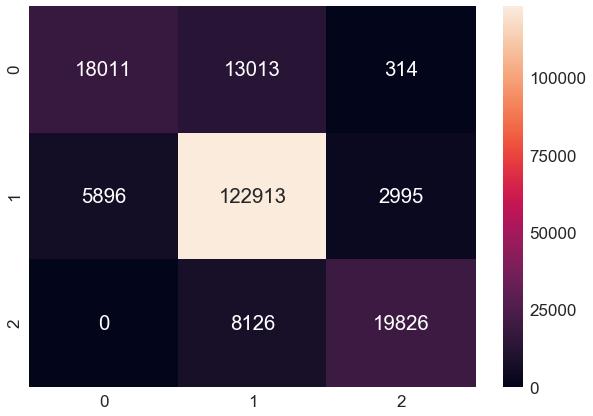

In [23]:
print classification_report(y_test, y_pred)
cm=confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, range(n_classes),range(n_classes))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.7)
sn.heatmap(df_cm, annot=True, fmt='g')

# Cross Validation

In [ ]:
clf = neighbors.KNeighborsClassifier(n_jobs=-1,n_neighbors=int(math.sqrt(len(X_train.index)))
sss = StratifiedShuffleSplit(n_splits=10)
scoresSSS = cross_val_score(clf, X, y, cv=sss, scoring='accuracy')
print(scoresSSS)


# Neural Network

In [3]:
import keras
import graphviz
import pydot_ng as pydot
from keras.models import Sequential
from keras.utils import to_categorical, plot_model
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

In [16]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=4))
model.add(Dropout(0.5))
for i in range(1,3):
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])


pydot.find_graphviz()
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [67]:
y_trainBinary = to_categorical(y_train)
hist = model.fit(X_train, y_trainBinary,validation_split=0.33,epochs=50,batch_size=128)


Train on 512129 samples, validate on 252243 samples
Epoch 1/50
307840/512129 [=================>............] - ETA: 6s - loss: 0.4131 - acc: 0.8383

KeyboardInterrupt: 

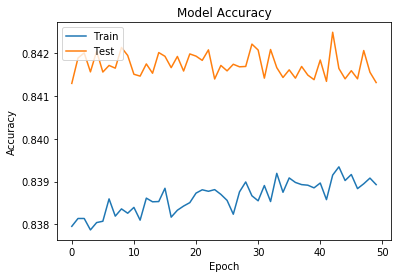

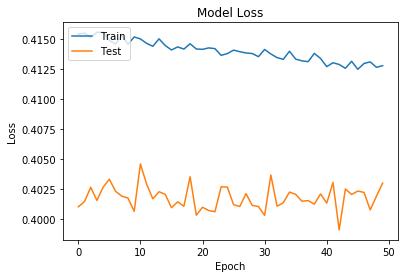

In [65]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [55]:
evals = model.evaluate(X_train, y_trainBinary, batch_size=len(X_train.index)/10)
y_pred=model.predict(X_test)
print evals

764372/764372 [==============================] - 2s 2us/step
[0.4034374830272785, 0.8414188362014505]


128 4layer ln=0.01 --> 0.841
